**Importing Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Reading the dataset**

In [2]:
#importing the dataset
df=pd.read_csv('C:\\Users\\devas\\OneDrive\\Desktop\\Student_scores.csv')

**Showing the dataset**

In [4]:
#printing the first ten values
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#describing the various quartiles and min and max values
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#finding for null values and tyoe of values present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the graph of the datapoints**

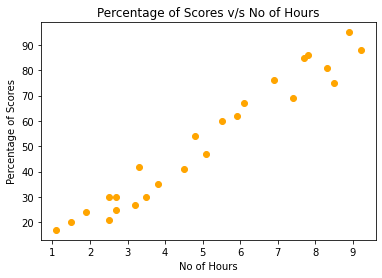

In [102]:
#plotting the graph of study hours v/s scores
plt.scatter(x=df['Hours'],y=df['Scores'],color='orange')
plt.xlabel('No of Hours')
plt.ylabel('Percentage of Scores')
plt.title('Percentage of Scores v/s No of Hours')
plt.show()

**Splitting the dataset into independent and dependent variables**

In [40]:
#splitting the dataset into dependent and independent variables
x=df.iloc[:,:-1].values #dependent variable
y=df.iloc[:,1].values #independent variable
x
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [41]:
#importing the required sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

**Splitting into training and testing dataset**

In [42]:
#splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [67]:
#printing the training and testing datasets
x_train=x_train.reshape(-1,1)
x_train

array([[3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [68]:
x_test=x_test.reshape(-1,1)
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1]])

In [69]:
y_train

array([35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85, 17, 69, 88],
      dtype=int64)

In [70]:
y_test

array([81, 30, 21, 76, 62, 25, 42, 47], dtype=int64)

**Building the Linear Regression Model**

In [71]:
#model building
lr=LinearRegression() 
lr.fit(x_train,y_train)
print('Model has been trained!!!')

Model has been trained!!!


**Printing the co-efficient and intercept**

In [72]:
#printing the coeffienct and intercept
coef=lr.coef_
inter=lr.intercept_
print('Co-efficient=',coef)
print('Intercept=',inter)

Co-efficient= [9.71054094]
Intercept= 2.794196676599803


**Plotting the Regression Model**

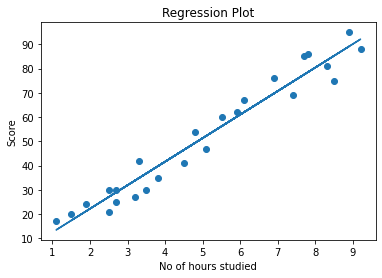

In [73]:
#plotting the regression model
score=coef*x+inter
plt.scatter(x,y)
plt.plot(x,score)
plt.xlabel('No of hours studied')
plt.ylabel('Score')
plt.title('Regression Plot')
plt.show()

**Predicting the values**

In [74]:
#Predicting the values
y_pred=lr.predict(x_test)
y_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [75]:
#comparing the actual and predicted values
print('Actual Values',y_test)
print('Predicted Values',y_pred)

Actual Values [81 30 21 76 62 25 42 47]
Predicted Values [83.39168645 27.07054902 27.07054902 69.79692914 60.0863882  29.0126572
 34.83898177 52.31795545]


**Evaluating the performance of the model and checking the R-Square Value**

In [95]:
#Evaluating the model performance
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('R2 Score=',r2)
print('Mean Squared Error Score=',mse)
print('Root Mean Squared Error Score=',rmse)

R2 Score= 0.9487647340257012
Mean Squared Error Score= 23.61945761415174
Root Mean Squared Error Score= 4.859985351228103


**Predicting the Score with given no of hours**

In [94]:
#Predicting the score with our own value that is given
hours=[[9.25]]
pred1=lr.predict(hours)
print('No of hours=',hours[0][0])
print('The predicted score=',pred1[0])

No of hours= 9.25
The predicted score= 92.61670033840096
